# The Scikit Learn Python Library

The scikit-learn (Sklearn) library contains simple and efficient tools for predictive data analysis.

It is the most useful and robust library for machine learning in Python. It provides a range of efficient tools for machine learning and statistical modeling [1]
It includes tools for:
- Classification: A process of categorizing a set of data into classes. Can be done on structured and unstructured data [2]
- Regression: Regression models are used to predict a continuous value.[3]
- Clustering : Clustering is grouping unlabeled examples to understand a data set. Common applications of clustering includes social network analysis, search result grouping, medical imaging[4]
- Dimensionality reduction: Techniques that reduce the number of input variable in training data. High demensional data might have hundres, thousands or even millions of input variables. Fewer inputs means fewer parameters or a simpler structure in the machine learning model. [5]

SKlearn is built upon NumPy, SciPy and Matplotlib




## Features
The Scikit-learn library is focused on modeling data. Some of the most popular models in the library include:
- Supervised learning algorithms : Almost all of the popular learning algorithms are part of scikit-learn. E.g. Linear Regression, Support Vector Machine, Decision Tree
- Unsupervised learning algorithms: Also has the popular unsupervised learning algorithms. E.g. clustering, factor analysis, PCA.
- Cross Validation : Used to check the accuracy of supervised models on unseen data.
- Ensemble Methods: Used to check the accuracy of supervised models on unseen data.

### Estimators - Learning and Predicting

Sklearn provides dozens of estimators which are built-in machine learning algorithms and models[6]. Each estimator can be fitted to some data using its fit method. This allows the estimator to learn from the model.

In [36]:
#example of fitting a RandomForestClassifier estimator to some basic data
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(random_state=0)

In [50]:
X = [[ 1,  2,  3],  # 2 samples, 3 features
    [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)

SVC()

The fit method accepts 2 inputs:

1. The sample/design matrix, X. X represents data that is observed at training and prediction time. The size of X is typically (n_samples, n_features). This means that __samples are represented as rows__ and __features are represented as columns__.   
Features are how samples are represented in a numeric or caterogical quantity.[7]   

2. The target values y which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, y does not need to be specified. y is usually 1d array where the i th entry corresponds to the target of the i th sample (row) of X. 

Both X and y are usually expected to be numpy arrays.
Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator:

## Sklearn Tutorial Example
In this examplee the task of the digits dataset is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.[8]

In [76]:
#sklearn.svm.SVC is an example of an estimator. SVC stands for support vector classification. 
from sklearn import svm
import matplotlib.pyplot as plt
clf = svm.SVC(gamma=0.001, C=100.)

In [79]:
#Estimator is fitter to the model through the fit method. This means the estimator must learn from this model
#Use all images from the dataset, except for the last which will be reserved for predicting
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [80]:
clf.predict(digits.data[-1:])

array([8])

The result is that the number best matching the below image is the number 8. [9]

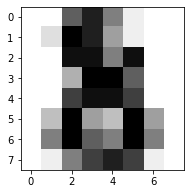

In [83]:
# Load the digits dataset
digits = datasets.load_digits()

# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Conventions
#### Type casting
Unless otherwise specified, input will be cast to float64.  
Regression targets are cast to float64 and classification targets are maintained. [8]  
Here the Support Vector Machine algorithm (sklearn.svm) is used.

In [3]:
import sklearn as sk
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
clf=SVC()

In [4]:
clf.fit(iris.data, iris.target)
SVC()

SVC()

In [5]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

Here, the first predict() returns an integer array, since iris.target (an integer array) was used in fit.

In [6]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [7]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

Here, predict() returns a string array, since iris.target_names was for fitting.

## Support Vector Machines Algorithm(SVM)
SVM is a supervised machine learning algorithm that can be used for both classificaiton or regression challenges.[11]. In this algorithm, we plot each data item as a point on a graph. This is called a __Support Vector.__  
A Support Vector Machine then is a frontier which best segregates data on a graph.[11]

### Classification 
SVC, NuSVC and LinearSVC are classes able to perform binary and multi-class classification on a dataset.  
SVC and NuSVC are very similar. The difference is that they accept different parameters an have different mathematical formulations.

LinearSVC is a faster implementation of SVC for the case of a linear kernel. A linear kernel is used when the data is linearly separable i.e. can be separated using a single line. It is mostly used when there are a large number of features in a data set e.g. text classification. Each alphabet is a new feature. [12]

The main advantage of using a linear kernel is that the training process is faster than any other kernel.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#import data
iris = datasets.load_iris()

In [18]:
# Take only the first two features of Data.
X = iris.data[:, :2]
y = iris.target

In [19]:
# C is the SVM regularization parameter
C = 1.0 

In [22]:
# Call fit so that the estimator learns from the data
svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)

# create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))

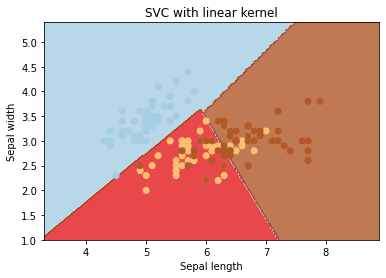

In [26]:
# Plot the data for Proper Visual Representation
plt.subplot(1, 1, 1)

# Predict the result by giving Data to the model
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
  
# Output the Plot
plt.show()

In this graph, all features are separated using simple lines, which represents the linear kernel.

### Refitting and updating parameters
Hyper-parameters of an estimator can be updated after it has been constructed via the set_params() method. Calling fit() more than once will overwrite what was learned by any previous fit():  

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.[10]

In [8]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)

## References
[1] https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm  

[2] https://www.edureka.co/blog/classification-in-machine-learning/  

[3] https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec  

[4] https://developers.google.com/machine-learning/clustering/overview  

[5] https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/  

[6] https://scikit-learn.org/stable/getting_started.html  

[7] https://scikit-learn.org/stable/glossary.html#term-feature  

[8] https://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset

[9] https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html  

[10] https://scikit-learn.org/stable/modules/grid_search.html  

[11] https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/?utm_source=blog&utm_medium=understandingsupportvectormachinearticle  

[12] https://www.geeksforgeeks.org/creating-linear-kernel-svm-in-python/